<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/linear-regression/linear_regression_bostonhousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import CSV input data from GH**

In [1]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2022-03-19 10:42:46--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2022-03-19 10:42:46--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.003s  

2022-03-19 10:42:47 (11.3 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



**Import Library**

In [2]:
import pandas as pd

**Load Boston Housing data**

In [5]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**Create X and Y variables**

In [7]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [9]:
X = BostonHousing.drop(['medv'],axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


**Data Split**

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [16]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


**Linear Regression Model**

In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

**Build Linear Regression Model**

In [19]:
model = linear_model.LinearRegression()

**Fit Training Data X, Y to the model**

In [20]:
model.fit(X_train,Y_train)

LinearRegression()

**Apply model to Test Data to predict Y**

In [22]:
Y_pred = model.predict(X_test)
Y_pred

array([13.87666239, 28.00385386, 35.47098026, 19.03001375, 23.2761069 ,
       15.74887815, 23.38451899, 38.89541039, 32.61187648, 32.26829144,
       15.05909453, 22.72152351, 24.65868164, 15.93931601, 28.85378373,
       13.98905648, 16.89518869, 22.89490038,  7.2197848 , 13.03209364,
       29.37513516, 19.41078477, 20.63417055, 25.15776234, 37.97555929,
       21.53834706, 28.46688691, 23.4757541 , 21.21683847, 30.75823618,
       17.15649557, 16.2105715 , 19.80119653, 15.01224216,  7.24212425,
       24.1911807 , 20.4043152 , 15.41020096,  9.24344613, 22.16546659,
       24.36412374, 25.45859509, 34.82320536, 22.094204  , 20.6526487 ,
       20.32050687, 17.83467232, 14.3401059 , 17.18795718, 30.45063479,
       18.49535129, 32.04889988, 30.54012916,  3.84194149, 16.83333196,
       33.42142567, 16.93206407, 20.87895218, 38.18929402, 27.09866178,
       15.86376613, 19.83626359, 24.48424402, 25.22403584, 34.47054703,
        4.99775188, 15.78085168,  8.67128432, 20.45857627, 16.18

**Prediction Results and Coefficients**

In [25]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of Determination: %.2f" % r2_score(Y_test,Y_pred))

Coefficients:  [-7.97795385e-02  4.45397126e-02  3.87349807e-02  3.35362384e+00
 -1.73857931e+01  3.79117634e+00 -1.46598169e-03 -1.42290236e+00
  2.54230127e-01 -1.25082129e-02 -8.53097433e-01  6.35627507e-03
 -5.51144993e-01]
Intercept:  36.116437303529565
Mean Squared Error: 28.19
Coefficient of Determination: 0.69


**Plot Predictions**

In [26]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


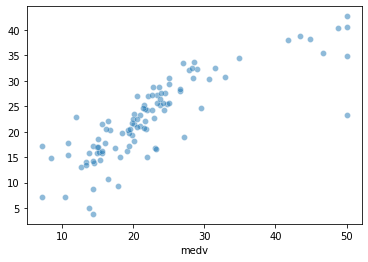

In [28]:
sb.scatterplot(Y_test,Y_pred,alpha=0.5)